**Redução de Dimensionalidade**

Em diversos problemas envolvendo I.A com uma grande quantidade de volume de dados nos deparamos com um problema de desbalanceamento de classes, conhecido como a maldição da dimensionalidade. Porém com o avanço das mineração de dados, pode ser afirmado de forma satisfatória que há como resolver esse problema de desequilíbrio que afeta significativamente a precisão do modelo.
   
A diminuir a dimensão dos seus dados você tem como objetivo deixar o treinamento dos dados mais rápidos e auxiliar para o encontro de uma boa solução para o problema proposto, porém após a execução da redução perdemos algumas informações, o que implica dizer que o modelo pode mitigar sua potencialidade sem que haja uma forte razão, então deve-se primeiro tentar treinar seu modelo com os dados originais antes de considerar a redução da dimensionalidade.
    
Neste artigo vamos abordar de forma conceitual e prática três algoritmos de Redução de dimensionalidade: **t_SNE, PCA, Truncated SVD.**


**PCA -** 
    
  
   A análise de componentes principais (PCA) é uma maneira de identificar a relação entre características extraídas dos dados combinando múltiplas variáveis numéricas em um conjunto menor de variáveis, ou seja, visa a redução, eliminação de sobreposições e as escolha das formas mais representativas dos dados a partir de combinações lineares das variáveis originais.
 
   A PCA gera informações com a finalidade que você pode deixar o componente significativo enquanto ainda conserva os segmentos de maior relevância da totalidade dos destaques. Assim ainda, obtendo uma vantagem adicional, cada um dos novos destaques ou segmentos feitos após o PCA são, em geral, autônomos uns dos outros.


**t-SNE -**

É uma técnica de  redução de dimensionalidade não linear que age de forma indireta, sendo comumente adequada para conjunto de dados de alta dimensão. A t-SNE tem um maior uso em problemas de manipulação de imagens, PNL, informação genômica e preparação do discurso. A técnica pode ser implementada pela mapeação das informações multidimensionais para um espaço de menor dimensão e pesquisa padrões que podem gerar informações, de uma forma mais simples ele incorpora os pontos de uma dimensão superior para uma dimensão inferior tentando preservar a vizinhança daquele ponto.

**Diferença entre PCA e t-SNE**
	
   Ambos são técnicas de redução de dimensionalidade, entretanto algumas diferenças podem ser notadas quando utilizarem da mesma.
   
**1º-** O t-SNE tem um maior tempo de execução se for aplicado há um conjunto de milhões de observações, além de ser computacionalmente caro, já o PCA irá finalizar a atividade em um menor período de tempo.
    
**2º** Há um diferença nos procedimentos, o PCA é um procedimento numérico já o t-SNE é um procedimento probabilístico.
    
**3º-** O PCA é sensível a outliers e o n-TSE sabe lidar melhor com esse problema.
    
**4º-** Ele tenta preservar a estrutura global dos dados, o t-SNE Tenta preservar a estrutura local (cluster) de dados.


**Truncated SVD -**

Também é uma técnica de redução de dimensionalidade, mais utilizada em dados com um significativo número de valores missings, ou com dados esparsos, como por exemplo: sistema de recomendação de produtos em que cada usuário comenta ou classifica um produto, porém uma grande quantidade de clientes não utilizam desse meio, dessa forma, gerando valores zero nos dados.

O SVD utiliza a fatoração de matriz semelhante ao PCA, a diferença é que a Análise de Componentes Principal utiliza matriz de covariância. 

A SVD truncada com matriz de dados fatorada pode ser explicada como o número de colunas sendo igual ao truncamento. Também ele exclui os dígitos após a casa decimal para diminuir o valor dos dígitos flutuantes matematicamente. Por exemplo, 3,349 pode ser truncado para 3,5.


**Agora vamos para parte prática**

**Bibloteca**

In [1]:
import numpy as np
import pandas as pd
from dfply import*

**Coleta de dados**

In [9]:
df_train = pd.read_csv('train.csv')
df_train >>head(3)

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0


O **Credit Default** é categoria de inadimplência no banco, na qual, 0 = bom pagador e 1 = inadimplente.

**Encoder**

Para lidar com as variáveis nominais (categóricas) vamos utilizar o Label Encoder, assim transformando em variáveis binárias.

In [10]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df_train['Home Ownership'] = label_encoder.fit_transform(df_train['Home Ownership'])
df_train['Purpose'] = label_encoder.fit_transform(df_train['Purpose'])
df_train['Term'] = label_encoder.fit_transform(df_train['Term'])
df_train['Years in current job'] = label_encoder.fit_transform(df_train['Years in current job'])

**Preenchendo valores NaN.**

In [11]:
df_train.fillna(-99999, inplace=True)

**Seprando as variáveis X e Y**

In [12]:
X = df_train.drop('Credit Default', axis=1)
y = df_train['Credit Default']

In [13]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y,  test_size = 0.7, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD


#Implementação do T-SNE
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

#Implementação do PCA
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_scaled)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X_scaled)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 1.1e+02 s
PCA took 2.2 s
Truncated SVD took 0.047 s


**Criando Scatter Plot das dimensões reduzidas**

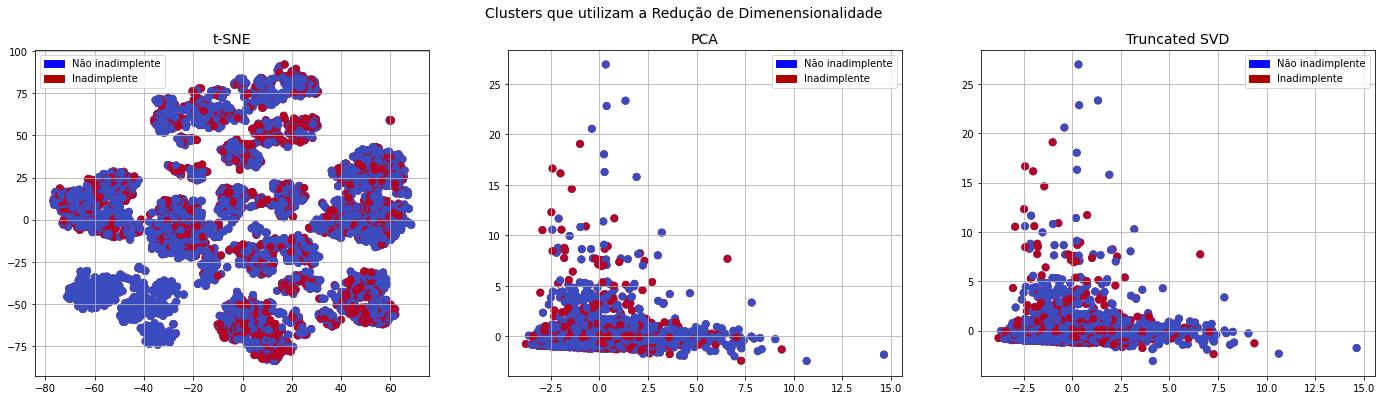

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters que utilizam a Redução de Dimenensionalidade', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Não inadimplente')
red_patch = mpatches.Patch(color='#AF0000', label='Inadimplente')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Não Fraude', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Não Fraude', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Não Fraude', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

A diminuição das dimensões geram dados menos esparsos e reduzir as informações nem sempre estamos reduzindo a habilidade de predição (por isso ele é importante).

**Referências**

Chicago. Chollet, Francois. 2017. Deep Learning with Python. New York, NY: Manning Publications.

Provost, Foster, Fawcett, Tom. (2013). Data Science for Business: What You Need to Know about Data Mining and Data-Analytic Thinking . Sebastopol, California: O\'Reilly.

https://medium.com/@lucasgmpaiva1/redu%C3%A7%C3%A3o-de-dimensionalidade-6b98b360ff6a

https://lvdmaaten.github.io/tsne/

https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/